In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("dark")
plt.rcParams['figure.figsize'] = 16, 12
import pandas as pd
from tqdm import tqdm_notebook
import io
from PIL import Image
from glob import glob
from collections import defaultdict
import os
import pickle
from io import BytesIO
import cv2

import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
from torchvision.datasets import ImageFolder

from kaggle_camera_model_id_lib.utils import ImageList, NpzFolder, NCrops, TifFolder, TifFolderExFiles
from kaggle_camera_model_id_lib.models import VggHead, StyleVggHead
from kaggle_camera_model_id_lib.utils import jpg_compress, equalize_v_hist

In [2]:
val_path = '/home/mephistopheies/storage2/data/camera-model-id/val/'
test_path = '/home/mephistopheies/storage2/data/camera-model-id/raw/test/'
train_path = '/home/mephistopheies/storage2/data/camera-model-id/raw/train/'
model_path = '/home/mephistopheies/storage2/data/camera-model-id/models/Vgg19Head_E_3b_bn/384/best_model.tar'
out_dir = '/home/mephistopheies/storage2/data/camera-model-id/submit/'
model_type = 'Vgg19Head_E_3b_bn'
n_classes = 10
crop_size = 384
step = 128
batch_size = 5
num_workers = 1
crop_center_size = 1520

to_tensor = transforms.ToTensor()
normalize = transforms.Normalize(
    mean=[0.485, 0.456, 0.406],
    std=[0.229, 0.224, 0.225]
)
center_crop = transforms.CenterCrop(crop_center_size)

In [1]:
# model_factory = {
#     'Vgg19Head_E_2b_bn': lambda n_classes: VggHead(num_classes=n_classes, load_vgg_bn=True, batch_norm=True),
#     'Vgg19Head_E_3b_bn': lambda n_classes: VggHead(num_classes=n_classes, load_vgg_bn=True, batch_norm=True),
#     'Vgg19Head_E_bn': lambda n_classes: VggHead(num_classes=n_classes, load_vgg_bn=True, vgg_key='E', batch_norm=True),
#     'Vgg11Head_A_bn': lambda n_classes: VggHead(num_classes=n_classes, load_vgg_bn=True, vgg_key='A', batch_norm=True),
#     'Vgg11Head_A': lambda n_classes: VggHead(num_classes=n_classes, load_vgg_bn=True, vgg_key='A', batch_norm=False),
#     'StyleVggHead_bn': lambda n_classes: StyleVggHead(num_classes=n_classes, load_vgg_bn=True),
#     'IEEEfcn': lambda n_classes: IEEEfcn(n_classes)
# }

# model = model_factory[model_type](n_classes)
# checkpoint = torch.load(model_path)
# model.load_state_dict(checkpoint['model'])
# loss_train = checkpoint['loss_train']
# acc_train = checkpoint['acc_train']
# loss_val = checkpoint['loss_val']
# acc_val = checkpoint['acc_val']
# class_to_idx = checkpoint['class_to_idx']
# idx2class = dict([(v, k) for (k, v) in class_to_idx.items()])
# print('Last state:\n  TLoss: %0.6f\n  TAcc:  %0.4f\n  VLoss: %0.6f\n  VAcc:  %0.4f' % 
#     (loss_train[-1], acc_train[-1], loss_val[-1], acc_val[-1]))
# del(checkpoint)
# model = model.cuda()
# model = model.eval()

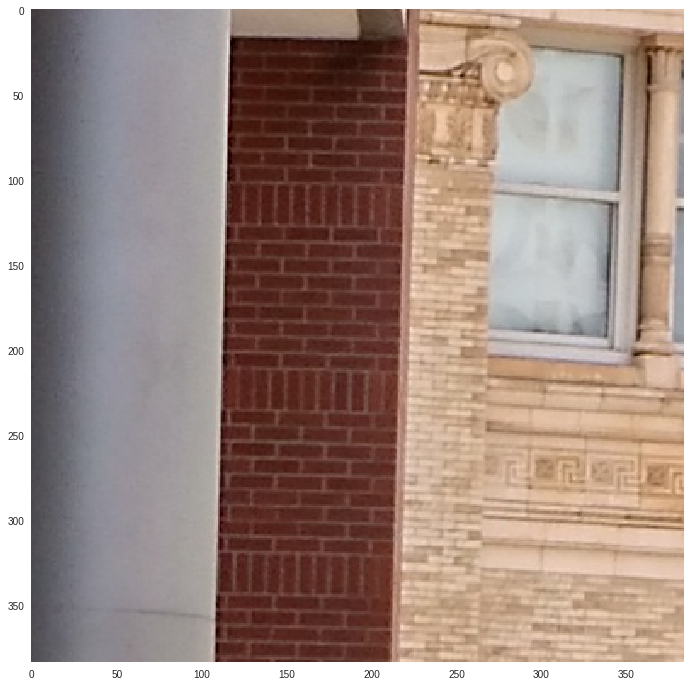

In [3]:
files = glob(os.path.join(train_path, '*/*.*'))
fname = files[1111]

img = np.array(center_crop(Image.open(fname)))
crops = NCrops(img, crop_size=crop_size, step=step)

img_rgb = crops[5]
img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

plt.imshow(img_rgb)

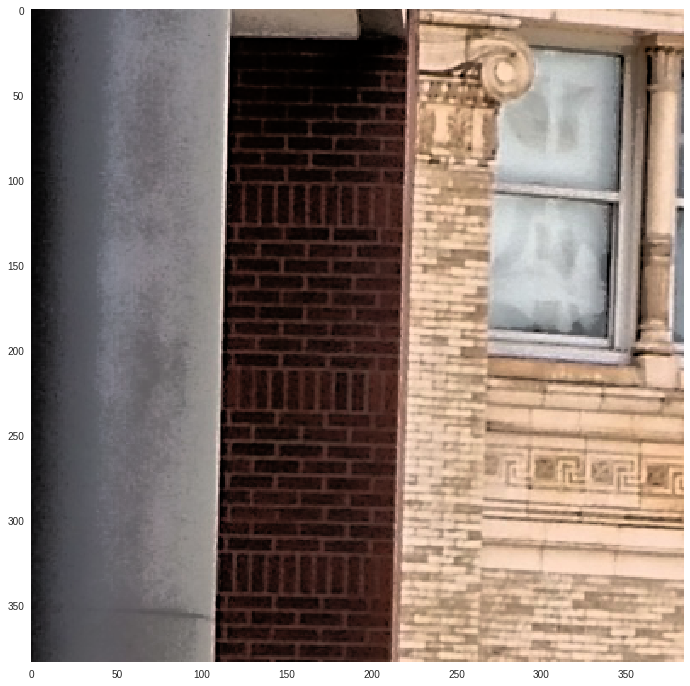

In [5]:
plt.imshow(equalize_v_hist(img_rgb))